## Step 1: download the Flight data from 2008

+ We're interested in predicting Departure Delays!

http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
import pandas as pd

df = pd.read_csv("../../DS-SF-32/dataset/2008.csv").fillna("unk")

In [10]:
df2 = df[df['DepDelay']!='unk'].head(10000).copy()


In [11]:
df2.shape

(10000, 29)

In [12]:
pd.options.display.max_columns = 999

df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,unk,0,unk,unk,unk,unk,unk
1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,unk,0,unk,unk,unk,unk,unk
2,2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,unk,0,unk,unk,unk,unk,unk
3,2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,unk,0,unk,unk,unk,unk,unk
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32


-2.0


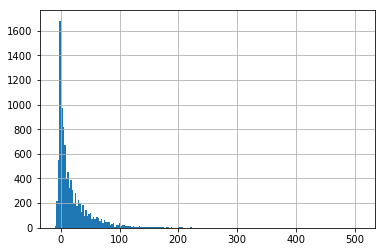

In [17]:
%matplotlib inline
df2['DepDelay'].hist(bins=200)
# print df2['DepDelay'].quantile(.1)

In [21]:
# print (df2['DepDelay']>30).head()
df2.loc[df2['DepDelay']>30]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32
6,2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,unk,0,10,0,0,0,47
11,2008,1,3,4,1644,1510,1845,1725,WN,1333,N334SW,121,135,107,80,94,IND,MCO,828,6,8,0,unk,0,8,0,0,0,72
19,2008,1,3,4,1416,1325,1512,1435,WN,54,N643SW,56,70,49,37,51,ISP,BWI,220,2,5,0,unk,0,12,0,0,0,25
21,2008,1,3,4,1657,1625,1754,1735,WN,623,N724SW,57,70,47,19,32,ISP,BWI,220,5,5,0,unk,0,7,0,0,0,12
26,2008,1,3,4,1422,1255,1657,1610,WN,188,N215WN,155,195,143,47,87,ISP,FLL,1093,6,6,0,unk,0,40,0,0,0,7
30,2008,1,3,4,2107,1945,2334,2230,WN,362,N798SW,147,165,134,64,82,ISP,MCO,972,6,7,0,unk,0,5,0,0,0,59
35,2008,1,3,4,1634,1555,1859,1845,WN,3480,N443WN,145,170,134,14,39,ISP,MCO,972,5,6,0,unk,0,unk,unk,unk,unk,unk
37,2008,1,3,4,1812,1650,1927,1815,WN,422,N779SW,135,145,118,72,82,ISP,MDW,765,6,11,0,unk,0,3,0,0,0,69
40,2008,1,3,4,1326,1230,1559,1530,WN,1056,N459WN,153,180,143,29,56,ISP,PBI,1052,5,5,0,unk,0,0,0,0,0,29


In [23]:
delay_split = 10
print df2.loc[df2['DepDelay']>delay_split].shape
print df2.loc[df2['DepDelay']<=delay_split].shape

(4681, 29)
(5319, 29)


In [28]:
df2.loc[:, 'LaterThan10'] = 0
df2.loc[df2['DepDelay']>10, 'LaterThan10'] = 1
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,LaterThan10
0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,unk,0,unk,unk,unk,unk,unk,0
1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,unk,0,unk,unk,unk,unk,unk,1
2,2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,unk,0,unk,unk,unk,unk,unk,0
3,2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,unk,0,unk,unk,unk,unk,unk,0
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32,1


In [29]:
print df2.loc[df2['DepDelay']>delay_split].shape
print df2.loc[df2['DepDelay']<=delay_split].shape

(4681, 30)
(5320, 30)


### This dataset is WAY TOO BIG for the get_dummies function

+ Feel free to test it out and eventually use the "interrupt" function when you get bored
+ Hey maybe it still works? Who knows. It took a while for me. 

In [ ]:
##pd.get_dummies(df[['TailNum', 'Origin', 'Dest']])

### Let's first investigate the String Vars here

In [32]:
string_vars = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
df2[string_vars].head(10)

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
0,WN,N712SW,IAD,TPA,unk
1,WN,N772SW,IAD,TPA,unk
2,WN,N428WN,IND,BWI,unk
3,WN,N612SW,IND,BWI,unk
4,WN,N464WN,IND,BWI,unk
5,WN,N726SW,IND,JAX,unk
6,WN,N763SW,IND,LAS,unk
7,WN,N428WN,IND,LAS,unk
8,WN,N689SW,IND,MCI,unk
9,WN,N648SW,IND,MCI,unk


In [33]:
df2['CancellationCode'].value_counts()

unk    10000
0          1
Name: CancellationCode, dtype: int64

## We can use the Label Encoder to map the Strings to numbers!

+ THESE ARE NOT DUMMY VARIABLES
+ Note the fit vs fit_transform function

In [ ]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

le.fit(df2['TailNum'])

le.transform(df2['TailNum'])



### Alternative: sklearn.preprocessing.LabelBinarizer

In [43]:
df2['TailNum'] = df2['TailNum'].apply(str)

In [44]:
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()

lb.fit(df2['TailNum'])

lb.transform(df2['TailNum']
             


SyntaxError: invalid syntax (<ipython-input-44-4ebfe57ad5aa>, line 9)

### TASK: How can you transform all character variables into numbers? 

+ Take 10 minutes to work with your partner

In [ ]:
#df2.loc[:, ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']] = df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].apply(lambda x: le.fit_transform(x), axis=0)


## Alternative

In [45]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

lb = MultiLabelBinarizer()

testX = lb.fit_transform(df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].as_matrix())

In [40]:
df2.loc[df2['CancellationCode']=='unk', 'CancellationCode'].value_counts()

Series([], Name: CancellationCode, dtype: int64)

In [47]:
textXdf = pd.DataFrame(data=testX, columns = lb.classes_)['unk'].value_counts()

In [54]:
import numpy as np

In [48]:
testX

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 0]])

In [49]:
y = df2['DepDelay']

df2.drop(['DepDelay'], axis = 1, inplace = True, errors = 'ignore')

KeyError: 'DepDelay'

In [50]:
df2.drop(['ArrDelay'], axis =1, inplace = True, errors = 'ignore')

In [51]:
df2.loc[:, 'CRSDepTime'] = df2['CRSDepTime'].astype(float)

In [52]:
import numpy as np

(df2.dtypes==np.int64).tolist()

is_cat_list = (df2.dtypes==np.int64).tolist()

In [53]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,LaterThan10
0,2008,1,3,4,2003,1955.0,2211,2225,WN,335,N712SW,128,150,116,IAD,TPA,810,4,8,0,unk,0,unk,unk,unk,unk,unk,0
1,2008,1,3,4,754,735.0,1002,1000,WN,3231,N772SW,128,145,113,IAD,TPA,810,5,10,0,unk,0,unk,unk,unk,unk,unk,1
2,2008,1,3,4,628,620.0,804,750,WN,448,N428WN,96,90,76,IND,BWI,515,3,17,0,unk,0,unk,unk,unk,unk,unk,0
3,2008,1,3,4,926,930.0,1054,1100,WN,1746,N612SW,88,90,78,IND,BWI,515,3,7,0,unk,0,unk,unk,unk,unk,unk,0
4,2008,1,3,4,1829,1755.0,1959,1925,WN,3920,N464WN,90,90,77,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32,1


### Now as a replacement for get_dummies we have OneHotEncoder

+ BUT YOU NEED TO SPECIFY WHICH VARIABLES ARE CATEGORICAL
+ Could we use "integer" type as a proxy for that?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(categorical_features = is_cat_list, sparse=False)

onehot.fit(df2)

X =onehot.transform(df2)


In [ ]:
X

In [ ]:
print X.shape

### Note that OneHot Encoder returns a sparse matrix

+ What is a sparse matrix?

In [ ]:
##This is how big the dataset is

X.shape

### Assignment part I - 15 minutes

+ Using a subsection of the full dataset...
    - (otherwise it will be impossibly large)
    - Create interaction variables for month and ArrDelay
    - Note that Month must first be a dummy variable
    - There are many ways to do this

### Assignment Part II

+ Run a Ridge regression with month dummies, arrival delay and the interaction vars
+ Keep track of the coefficients by saving the names to a list
+ Which variables are larger than zero? 
+ How does your model perform on the testing set?

In [ ]:
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:
from sklearn import linear_model
lr = linear_model.Ridge(normalize=True)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
print lr.coef_

In [ ]:
y_hat = lr.predict(X_train)


In [ ]:
%matplotlib inline

(y_train - y_hat).hist(bins=100)